Ingrese la ruta de la imagen .png: gato.png


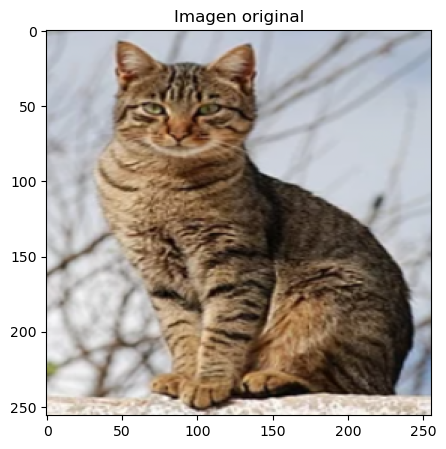

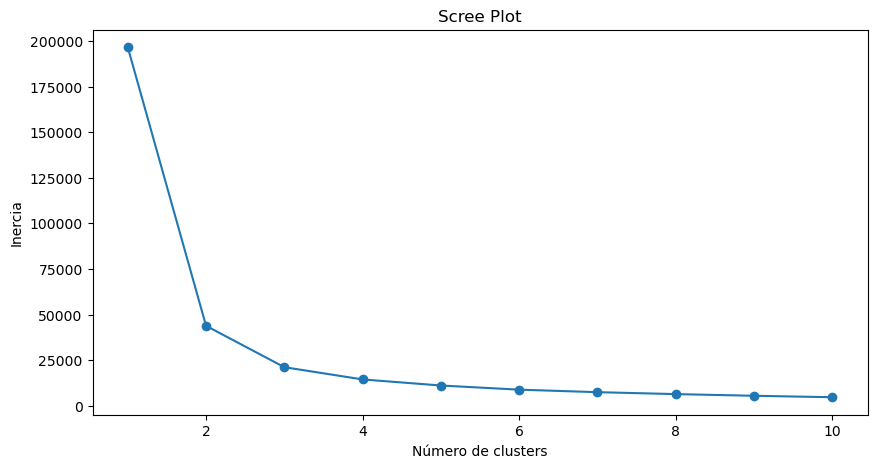

Ingrese el número óptimo de clusters basado en el scree plot: 6


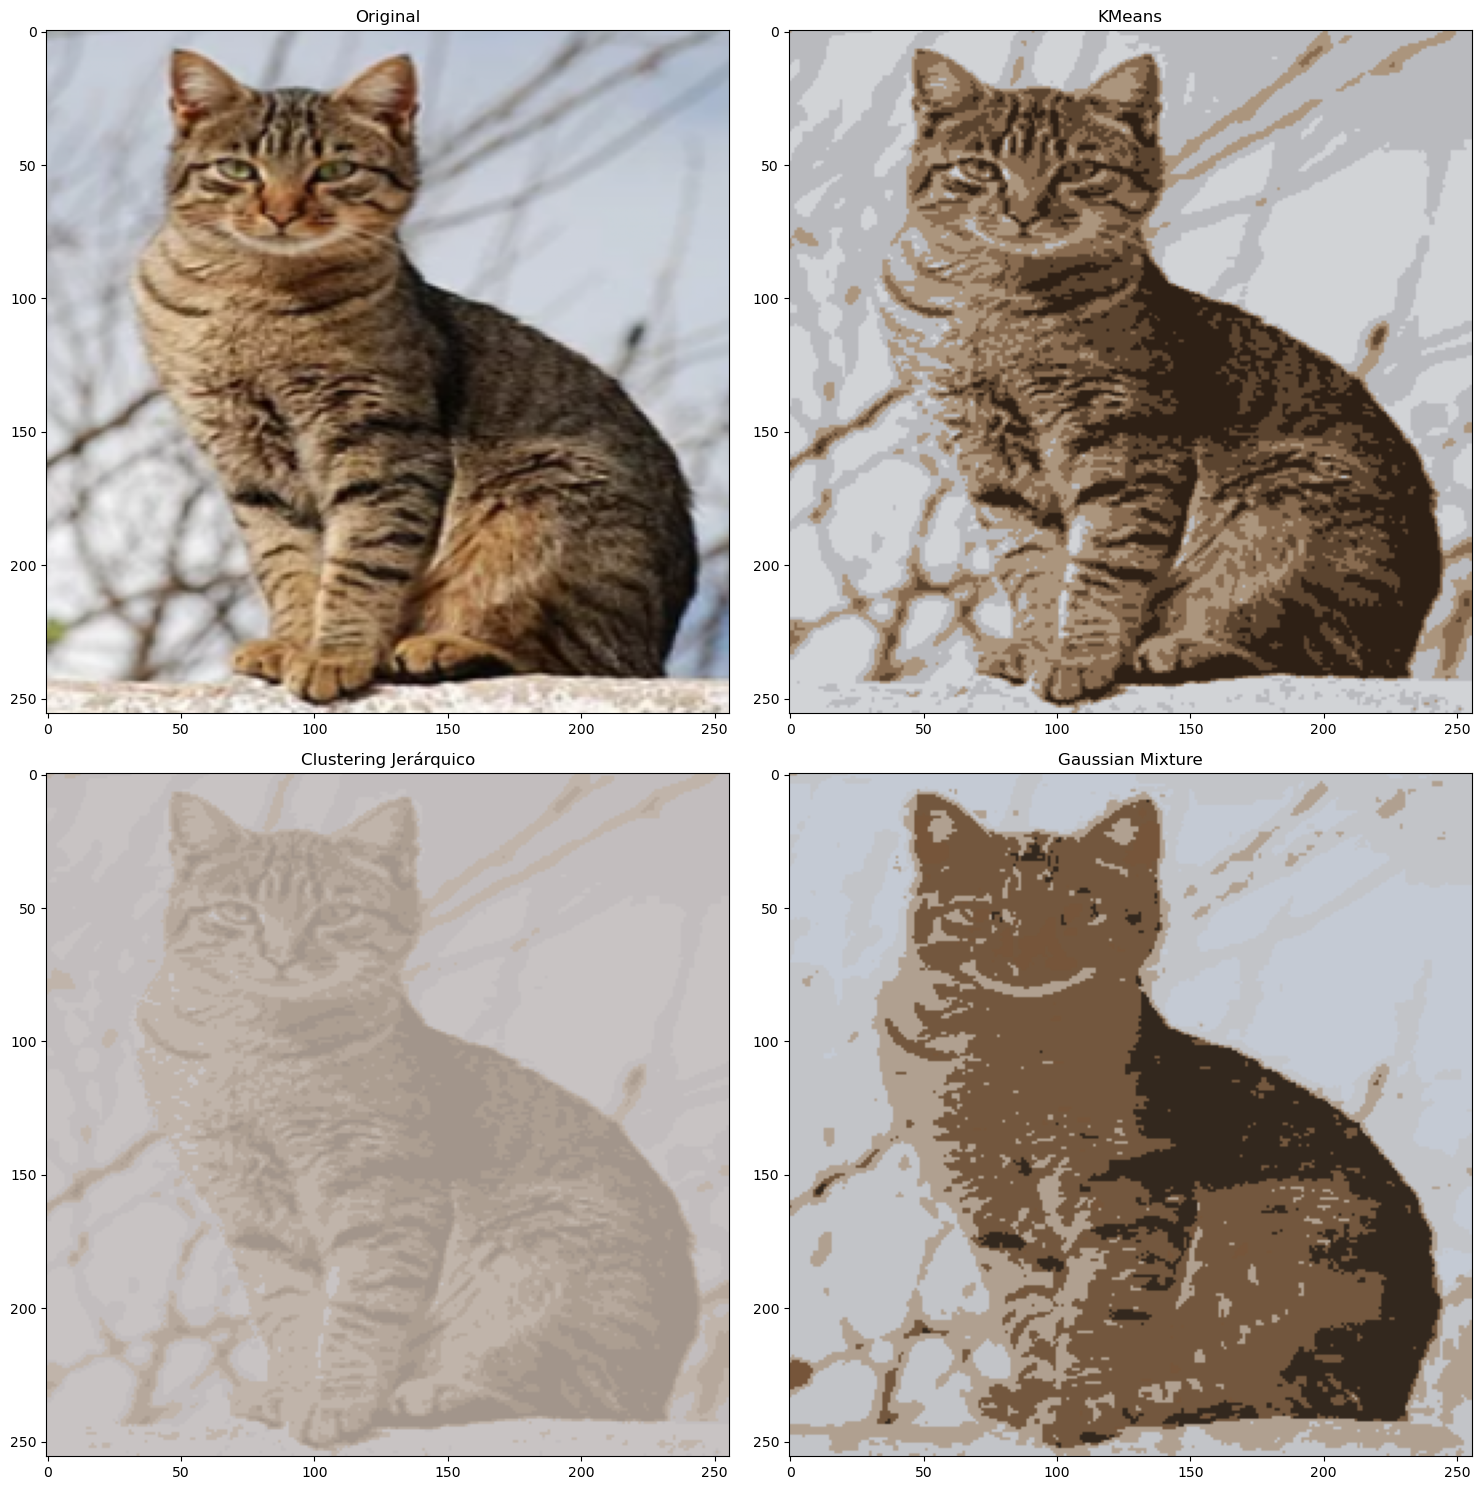

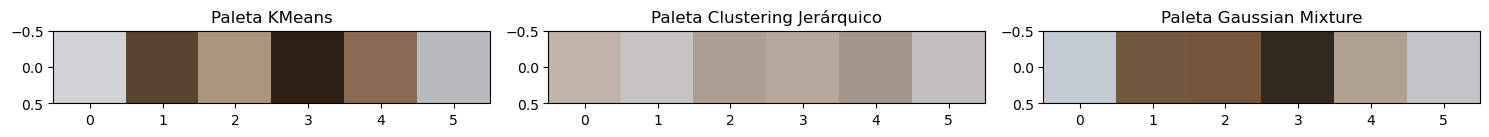

In [5]:
#codigo correcto

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from skimage import io
from skimage.transform import resize
from skimage.color import gray2rgb, rgba2rgb

# Cargar y preprocesar la imagen
def cargar_imagen(ruta):
    imagen = io.imread(ruta)
    
    # Convertir a RGB si es necesario
    if len(imagen.shape) == 2:  # Imagen en escala de grises
        imagen = gray2rgb(imagen)
    elif imagen.shape[2] == 4:  # Imagen RGBA
        imagen = rgba2rgb(imagen)
    
    return resize(imagen, (256, 256))

# Convertir imagen a array 2D de píxeles
def imagen_a_2d(imagen):
    return imagen.reshape(-1, imagen.shape[-1])

# Determinar número óptimo de clusters con scree plot
def scree_plot(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.title('Scree Plot')
    plt.show()

# Realizar clustering con KMeans
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    return kmeans.cluster_centers_, labels

# Realizar clustering jerárquico
def clustering_jerarquico(data, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(data)
    return labels

# Realizar clustering con mezclas gaussianas
def gaussian_mixture(data, n_components):
    gm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gm.fit_predict(data)
    return gm.means_, labels

# Recomponer la imagen con la paleta reducida
def recomponer_imagen(imagen_original, labels, paleta):
    imagen_plana = imagen_a_2d(imagen_original)
    nueva_imagen = np.zeros_like(imagen_plana)
    for i, label in enumerate(labels):
        nueva_imagen[i] = paleta[label]
    return nueva_imagen.reshape(imagen_original.shape)

# Función principal
def main(ruta_imagen):
    # Cargar imagen
    imagen = cargar_imagen(ruta_imagen)
    plt.figure(figsize=(5, 5))
    plt.imshow(imagen)
    plt.title("Imagen original")
    plt.show()

    # Preprocesar datos
    datos = imagen_a_2d(imagen)

    # Ajustar el StandardScaler
    scaler = StandardScaler()  # Instancia que ajusta los datos
    datos_normalizados = scaler.fit_transform(datos)

    # Scree plot para determinar número óptimo de clusters
    scree_plot(datos_normalizados)
    n_clusters = int(input("Ingrese el número óptimo de clusters basado en el scree plot: "))

    # KMeans
    paleta_kmeans, labels_kmeans = kmeans_clustering(datos_normalizados, n_clusters)
    # Desescalar los centroides a su valor original utilizando el scaler ya ajustado
    paleta_kmeans_original = scaler.inverse_transform(paleta_kmeans)  # Cambiado
    imagen_kmeans = recomponer_imagen(imagen, labels_kmeans, paleta_kmeans_original)

    # Clustering Jerárquico
    labels_jerarquico = clustering_jerarquico(datos_normalizados, n_clusters)
    paleta_jerarquico = np.array([datos[labels_jerarquico == i].mean(axis=0) for i in range(n_clusters)])
    
    # Desescalar la paleta del clustering jerárquico usando el mismo scaler
    paleta_jerarquico_original = scaler.inverse_transform(paleta_jerarquico)  # Cambiado
    imagen_jerarquico = recomponer_imagen(imagen, labels_jerarquico, paleta_jerarquico_original)

    # Gaussian Mixture
    paleta_gm, labels_gm = gaussian_mixture(datos_normalizados, n_clusters)
    
    # Desescalar la paleta de Gaussian Mixture usando el mismo scaler
    paleta_gm_original = scaler.inverse_transform(paleta_gm)  # Cambiado
    imagen_gm = recomponer_imagen(imagen, labels_gm, paleta_gm_original)

    # Visualizar resultados
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    axs[0, 0].imshow(imagen)
    axs[0, 0].set_title("Original")
    axs[0, 1].imshow(imagen_kmeans)
    axs[0, 1].set_title("KMeans")
    axs[1, 0].imshow(imagen_jerarquico)
    axs[1, 0].set_title("Clustering Jerárquico")
    axs[1, 1].imshow(imagen_gm)
    axs[1, 1].set_title("Gaussian Mixture")
    plt.tight_layout()
    plt.show()

    # Mostrar paletas de colores
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow([paleta_kmeans_original])  # Cambiado
    axs[0].set_title("Paleta KMeans")
    axs[1].imshow([paleta_jerarquico_original])  # Cambiado
    axs[1].set_title("Paleta Clustering Jerárquico")
    axs[2].imshow([paleta_gm_original])  # Cambiado
    axs[2].set_title("Paleta Gaussian Mixture")
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    ruta_imagen = input("Ingrese la ruta de la imagen .png: ")
    main(ruta_imagen)

Ingrese la ruta de la imagen .png:  cuadro.png


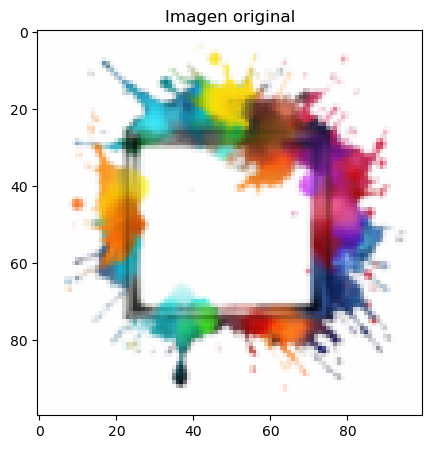

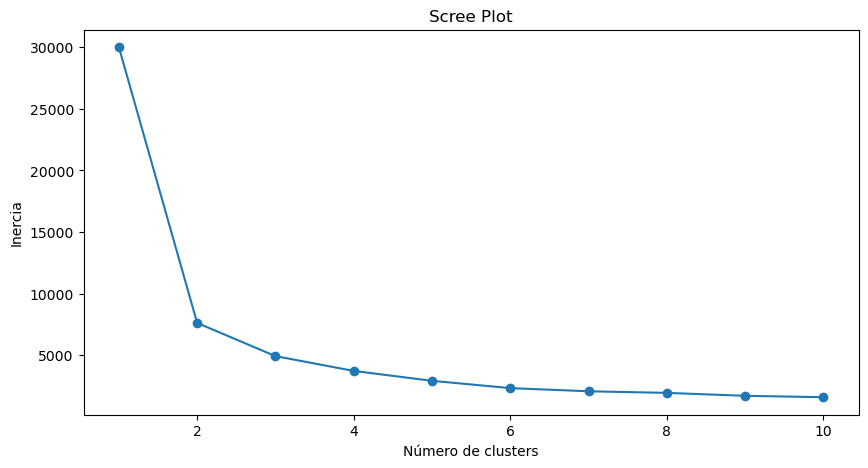

Ingrese el número óptimo de clusters basado en el scree plot:  6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


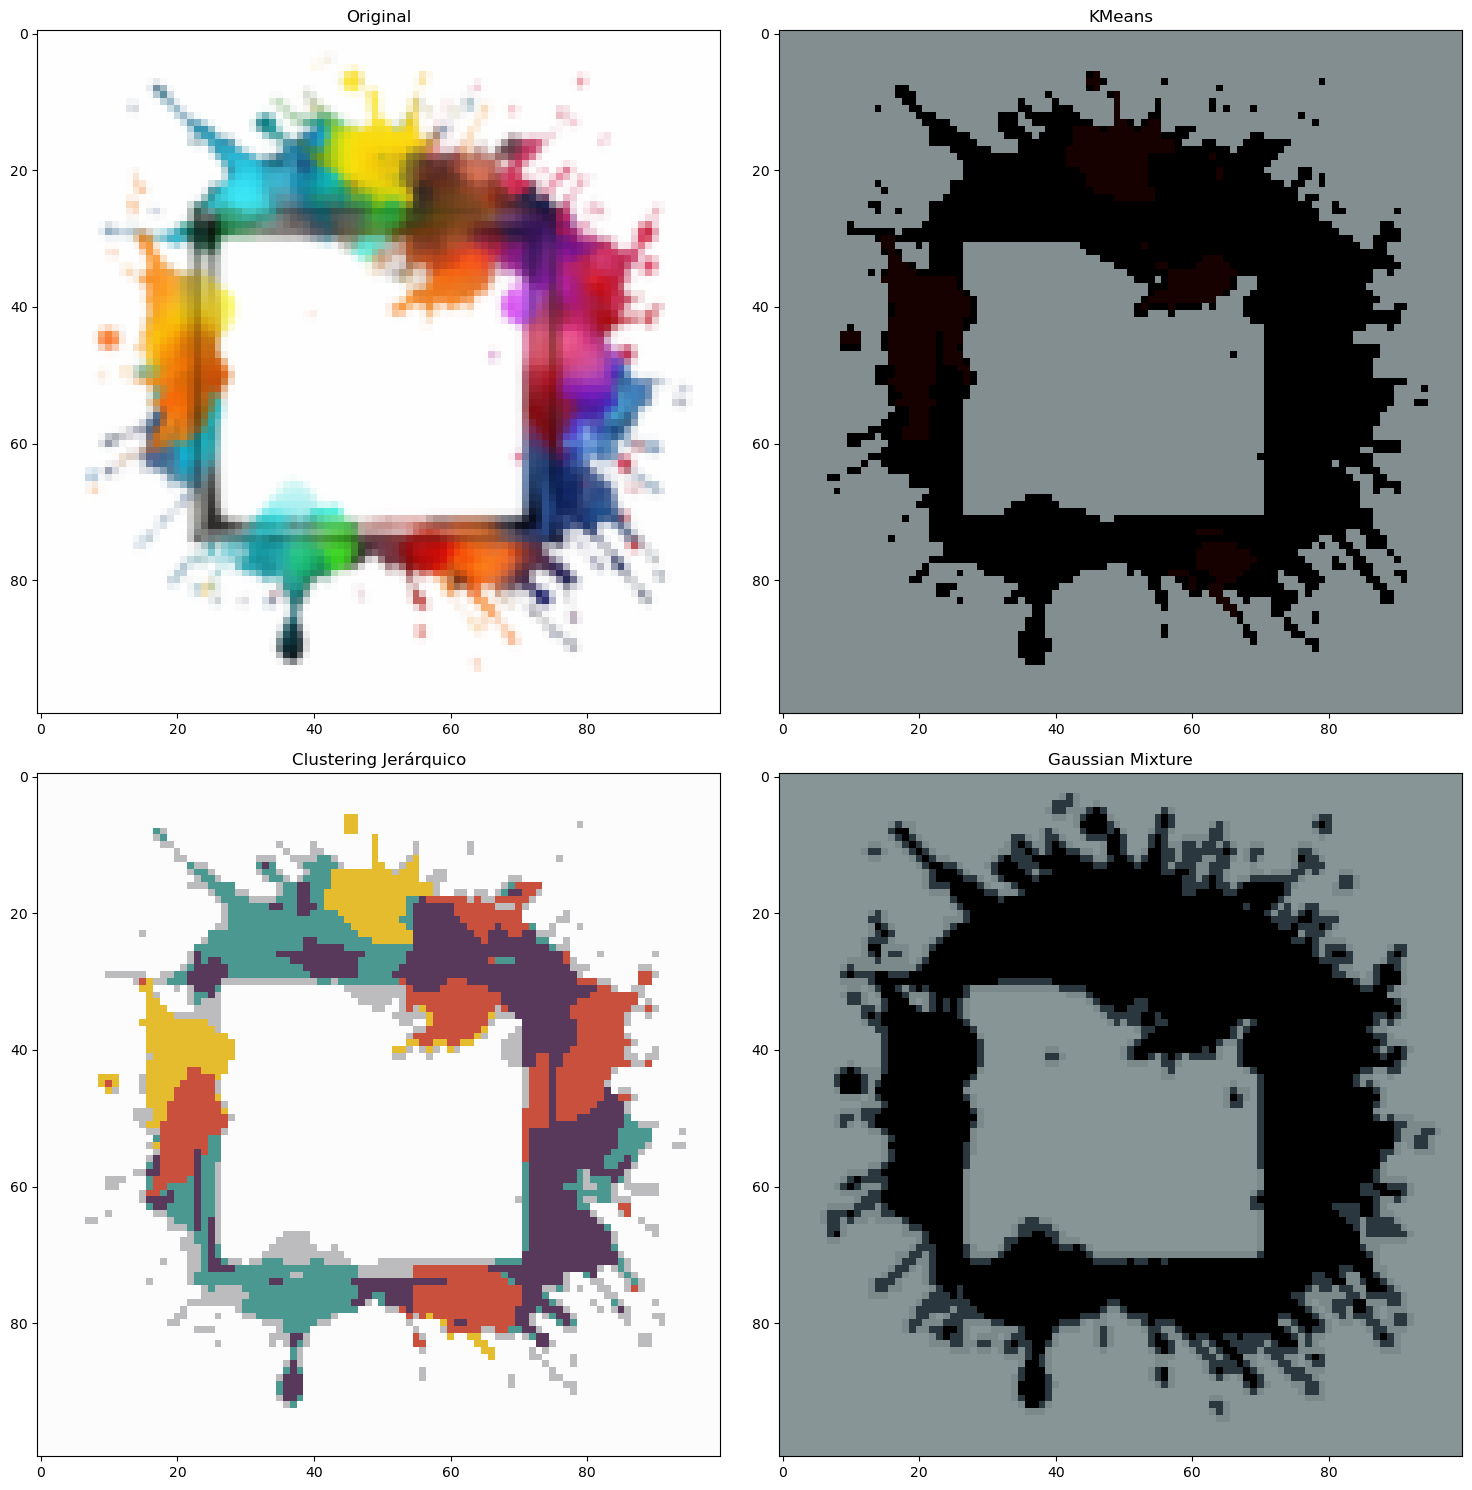

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


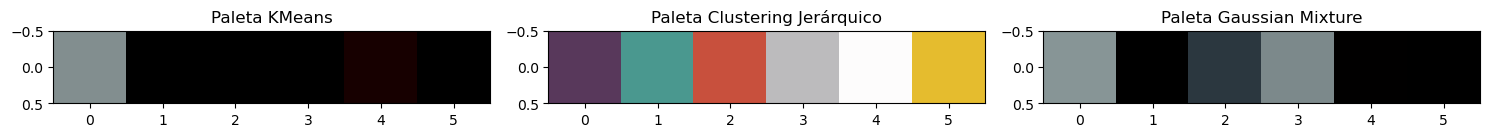

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from skimage import io
from skimage.transform import resize
from skimage.color import gray2rgb, rgba2rgb

# Cargar y preprocesar la imagen
def cargar_imagen(ruta):
    imagen = io.imread(ruta)
    
    # Convertir a RGB si es necesario
    if len(imagen.shape) == 2:  # Imagen en escala de grises
        imagen = gray2rgb(imagen)
    elif imagen.shape[2] == 4:  # Imagen RGBA
        imagen = rgba2rgb(imagen)
    
    return resize(imagen, (100, 100))

# Convertir imagen a array 2D de píxeles
def imagen_a_2d(imagen):
    return imagen.reshape(-1, imagen.shape[-1])

# Determinar número óptimo de clusters con scree plot
def scree_plot(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.title('Scree Plot')
    plt.show()

# Realizar clustering con KMeans
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return kmeans.cluster_centers_, labels

# Realizar clustering jerárquico
def clustering_jerarquico(data, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(data)
    return labels

# Realizar clustering con mezclas gaussianas
def gaussian_mixture(data, n_components):
    gm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gm.fit_predict(data)
    return gm.means_, labels

# Recomponer la imagen con la paleta reducida
def recomponer_imagen(imagen_original, labels, paleta):
    imagen_plana = imagen_a_2d(imagen_original)
    nueva_imagen = np.zeros_like(imagen_plana)
    for i, label in enumerate(labels):
        nueva_imagen[i] = paleta[label]
    return nueva_imagen.reshape(imagen_original.shape)

# Función principal
def main(ruta_imagen):
    # Cargar imagen
    imagen = cargar_imagen(ruta_imagen)
    plt.figure(figsize=(5, 5))
    plt.imshow(imagen)
    plt.title("Imagen original")
    plt.show()

    # Preprocesar datos
    datos = imagen_a_2d(imagen)
    datos_normalizados = StandardScaler().fit_transform(datos)

    # Scree plot para determinar número óptimo de clusters
    scree_plot(datos_normalizados)
    n_clusters = int(input("Ingrese el número óptimo de clusters basado en el scree plot: "))

    # KMeans
    paleta_kmeans, labels_kmeans = kmeans_clustering(datos_normalizados, n_clusters)
    imagen_kmeans = recomponer_imagen(imagen, labels_kmeans, paleta_kmeans)

    # Clustering Jerárquico
    labels_jerarquico = clustering_jerarquico(datos_normalizados, n_clusters)
    paleta_jerarquico = np.array([datos[labels_jerarquico == i].mean(axis=0) for i in range(n_clusters)])
    imagen_jerarquico = recomponer_imagen(imagen, labels_jerarquico, paleta_jerarquico)

    # Gaussian Mixture
    paleta_gm, labels_gm = gaussian_mixture(datos_normalizados, n_clusters)
    imagen_gm = recomponer_imagen(imagen, labels_gm, paleta_gm)

    # Visualizar resultados
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    axs[0, 0].imshow(imagen)
    axs[0, 0].set_title("Original")
    axs[0, 1].imshow(imagen_kmeans)
    axs[0, 1].set_title("KMeans")
    axs[1, 0].imshow(imagen_jerarquico)
    axs[1, 0].set_title("Clustering Jerárquico")
    axs[1, 1].imshow(imagen_gm)
    axs[1, 1].set_title("Gaussian Mixture")
    plt.tight_layout()
    plt.show()

    # Mostrar paletas de colores
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow([paleta_kmeans])
    axs[0].set_title("Paleta KMeans")
    axs[1].imshow([paleta_jerarquico])
    axs[1].set_title("Paleta Clustering Jerárquico")
    axs[2].imshow([paleta_gm])
    axs[2].set_title("Paleta Gaussian Mixture")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    ruta_imagen = input("Ingrese la ruta de la imagen .png: ")
    main(ruta_imagen)

Ingrese la ruta de la imagen .png:  vecteezy.png


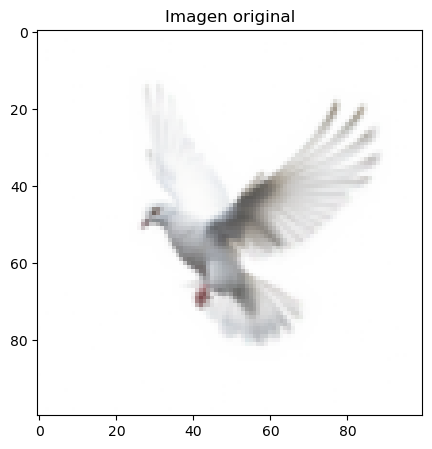

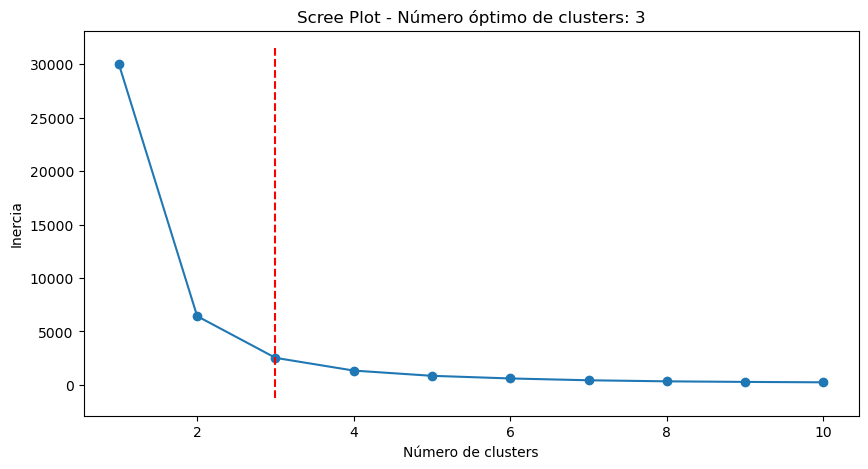

Número óptimo de colores en la paleta: 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


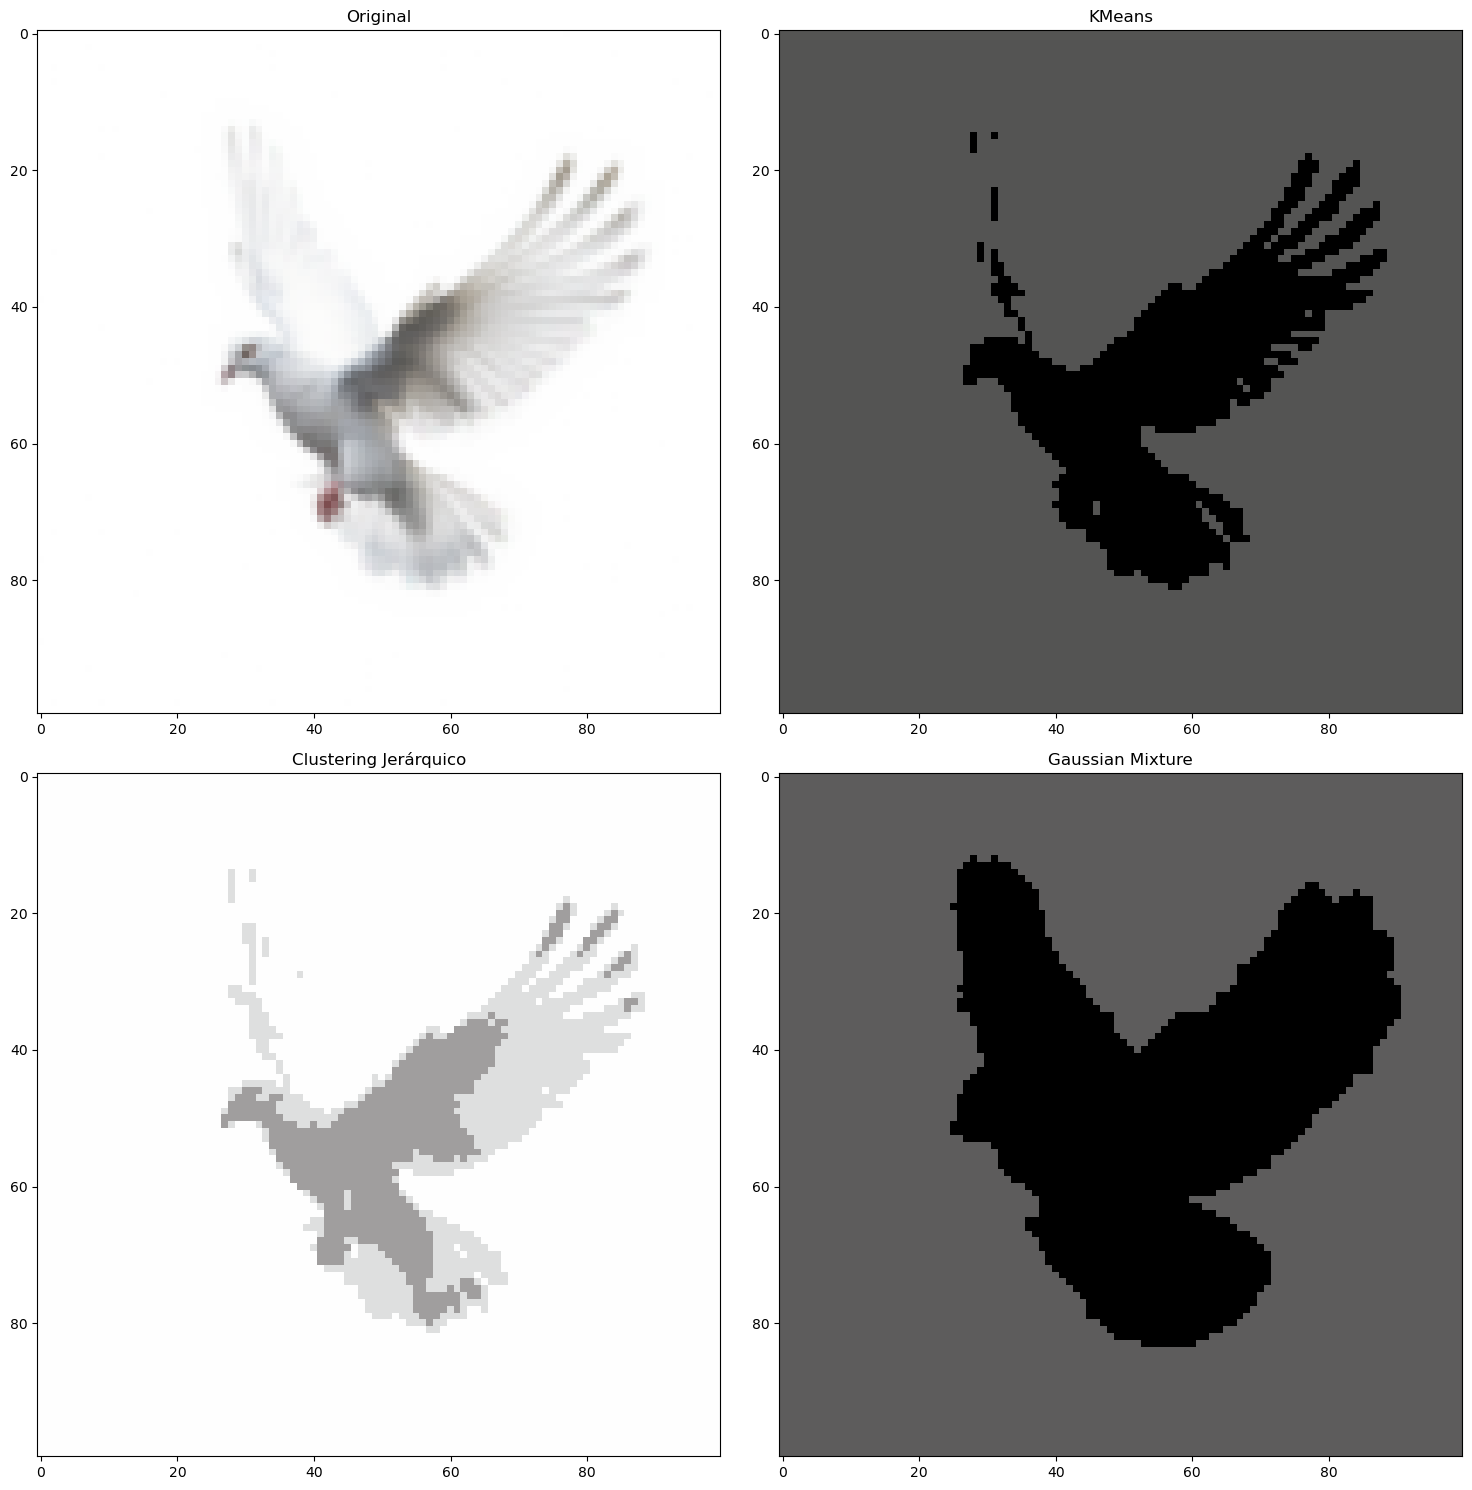

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


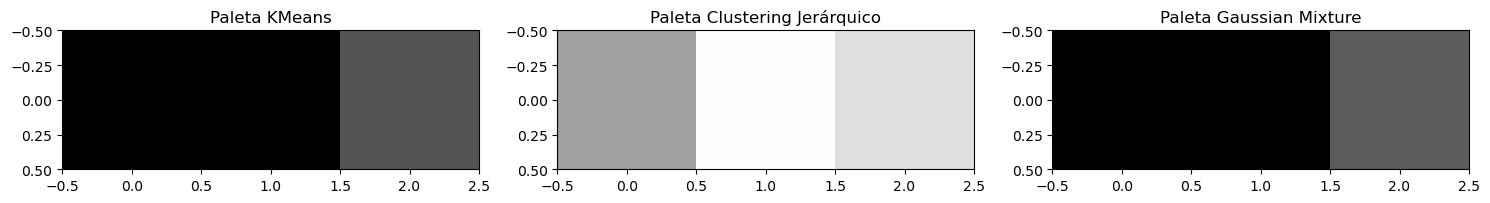

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from skimage import io
from skimage.transform import resize
from skimage.color import gray2rgb, rgba2rgb
from kneed import KneeLocator

# Cargar y preprocesar la imagen
def cargar_imagen(ruta):
    imagen = io.imread(ruta)
    
    # Convertir a RGB si es necesario
    if len(imagen.shape) == 2:  # Imagen en escala de grises
        imagen = gray2rgb(imagen)
    elif imagen.shape[2] == 4:  # Imagen RGBA
        imagen = rgba2rgb(imagen)
    
    return resize(imagen, (100, 100))

# Convertir imagen a array 2D de píxeles
def imagen_a_2d(imagen):
    return imagen.reshape(-1, imagen.shape[-1])

# Determinar número óptimo de clusters con scree plot
def scree_plot(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    # Usar KneeLocator para encontrar el punto de inflexión
    kneedle = KneeLocator(range(1, max_clusters + 1), inertias, curve='convex', direction='decreasing')
    optimal_clusters = max(3, kneedle.elbow)  # Aseguramos un mínimo de 3 clusters
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.vlines(optimal_clusters, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.title(f'Scree Plot - Número óptimo de clusters: {optimal_clusters}')
    plt.show()
    
    return optimal_clusters

# Realizar clustering con KMeans
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return kmeans.cluster_centers_, labels

# Realizar clustering jerárquico
def clustering_jerarquico(data, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(data)
    return labels

# Realizar clustering con mezclas gaussianas
def gaussian_mixture(data, n_components):
    gm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gm.fit_predict(data)
    return gm.means_, labels

# Recomponer la imagen con la paleta reducida
def recomponer_imagen(imagen_original, labels, paleta):
    imagen_plana = imagen_a_2d(imagen_original)
    nueva_imagen = np.zeros_like(imagen_plana)
    for i, label in enumerate(labels):
        nueva_imagen[i] = paleta[label]
    return nueva_imagen.reshape(imagen_original.shape)

# Función principal
def main(ruta_imagen):
    # Cargar imagen
    imagen = cargar_imagen(ruta_imagen)
    plt.figure(figsize=(5, 5))
    plt.imshow(imagen)
    plt.title("Imagen original")
    plt.show()

    # Preprocesar datos
    datos = imagen_a_2d(imagen)
    datos_normalizados = StandardScaler().fit_transform(datos)

    # Determinar número óptimo de clusters (colores)
    n_clusters = scree_plot(datos_normalizados)
    print(f"Número óptimo de colores en la paleta: {n_clusters}")

    # KMeans
    paleta_kmeans, labels_kmeans = kmeans_clustering(datos_normalizados, n_clusters)
    imagen_kmeans = recomponer_imagen(imagen, labels_kmeans, paleta_kmeans)

    # Clustering Jerárquico
    labels_jerarquico = clustering_jerarquico(datos_normalizados, n_clusters)
    paleta_jerarquico = np.array([datos[labels_jerarquico == i].mean(axis=0) for i in range(n_clusters)])
    imagen_jerarquico = recomponer_imagen(imagen, labels_jerarquico, paleta_jerarquico)

    # Gaussian Mixture
    paleta_gm, labels_gm = gaussian_mixture(datos_normalizados, n_clusters)
    imagen_gm = recomponer_imagen(imagen, labels_gm, paleta_gm)

    # Visualizar resultados
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    axs[0, 0].imshow(imagen)
    axs[0, 0].set_title("Original")
    axs[0, 1].imshow(imagen_kmeans)
    axs[0, 1].set_title("KMeans")
    axs[1, 0].imshow(imagen_jerarquico)
    axs[1, 0].set_title("Clustering Jerárquico")
    axs[1, 1].imshow(imagen_gm)
    axs[1, 1].set_title("Gaussian Mixture")
    plt.tight_layout()
    plt.show()

    # Mostrar paletas de colores
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow([paleta_kmeans])
    axs[0].set_title("Paleta KMeans")
    axs[1].imshow([paleta_jerarquico])
    axs[1].set_title("Paleta Clustering Jerárquico")
    axs[2].imshow([paleta_gm])
    axs[2].set_title("Paleta Gaussian Mixture")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    ruta_imagen = input("Ingrese la ruta de la imagen .png: ")
    main(ruta_imagen)

Ingrese la ruta de la imagen .png:  vecteezy.png


1. Importando librerías necesarias...

2. Cargando la imagen...


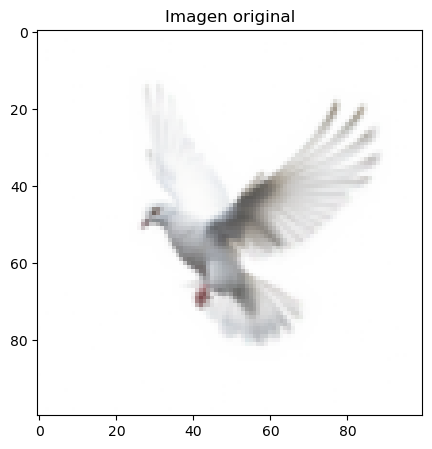


3. Realizando clustering...


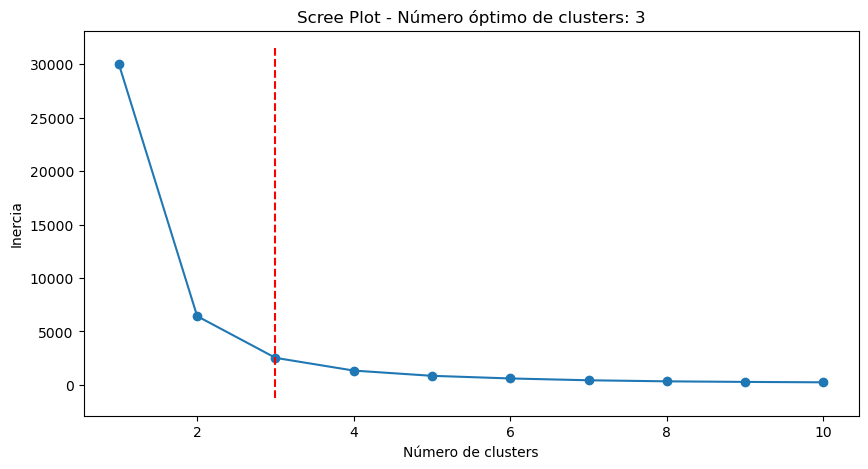

Número óptimo de colores en la paleta: 3

4. Determinando y explicando la paleta de colores...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Explicación de la paleta de colores:
Color 1: RGB(-1, -1, -1)
  Este color es predominantemente azul.
Color 2: RGB(-3, -3, -3)
  Este color es predominantemente rojo.
Color 3: RGB(0, 0, 0)
  Este color es predominantemente rojo.

5. Restaurando la imagen...


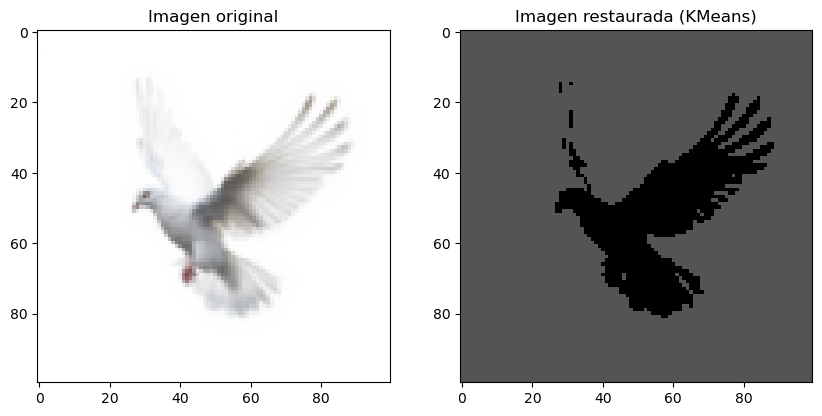


6. Realizando método de mezclas gaussianas...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


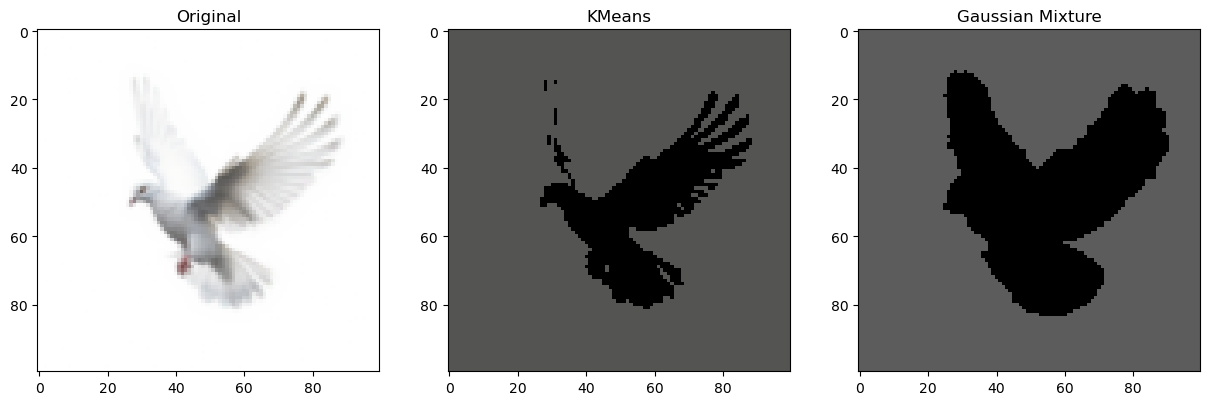

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Comparación de paletas de colores:


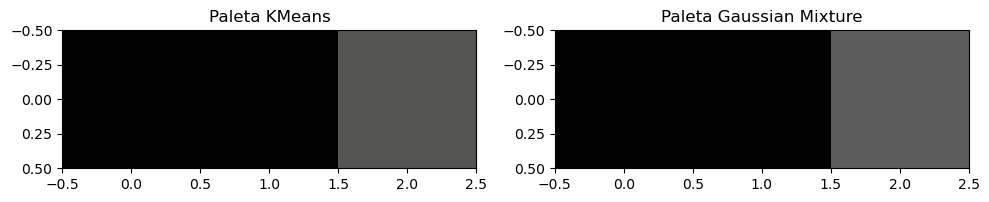

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from skimage import io
from skimage.transform import resize
from skimage.color import gray2rgb, rgba2rgb
from kneed import KneeLocator

# Cargar y preprocesar la imagen
def cargar_imagen(ruta):
    imagen = io.imread(ruta)
    
    # Convertir a RGB si es necesario
    if len(imagen.shape) == 2:  # Imagen en escala de grises
        imagen = gray2rgb(imagen)
    elif imagen.shape[2] == 4:  # Imagen RGBA
        imagen = rgba2rgb(imagen)
    
    return resize(imagen, (100, 100))

# Convertir imagen a array 2D de píxeles
def imagen_a_2d(imagen):
    return imagen.reshape(-1, imagen.shape[-1])

# Determinar número óptimo de clusters con scree plot
def scree_plot(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    # Usar KneeLocator para encontrar el punto de inflexión
    kneedle = KneeLocator(range(1, max_clusters + 1), inertias, curve='convex', direction='decreasing')
    optimal_clusters = max(3, kneedle.elbow)  # Aseguramos un mínimo de 3 clusters
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.vlines(optimal_clusters, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.title(f'Scree Plot - Número óptimo de clusters: {optimal_clusters}')
    plt.show()
    
    return optimal_clusters

# Realizar clustering con KMeans
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return kmeans.cluster_centers_, labels

# Realizar clustering jerárquico
def clustering_jerarquico(data, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(data)
    return labels

# Realizar clustering con mezclas gaussianas
def gaussian_mixture(data, n_components):
    gm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gm.fit_predict(data)
    return gm.means_, labels

# Recomponer la imagen con la paleta reducida
def recomponer_imagen(imagen_original, labels, paleta):
    imagen_plana = imagen_a_2d(imagen_original)
    nueva_imagen = np.zeros_like(imagen_plana)
    for i, label in enumerate(labels):
        nueva_imagen[i] = paleta[label]
    return nueva_imagen.reshape(imagen_original.shape)

# Explicar paleta de colores
def explicar_paleta(paleta):
    print("\nExplicación de la paleta de colores:")
    for i, color in enumerate(paleta):
        r, g, b = color
        print(f"Color {i+1}: RGB({int(r)}, {int(g)}, {int(b)})")
        if r > g and r > b:
            print(f"  Este color es predominantemente rojo.")
        elif g > r and g > b:
            print(f"  Este color es predominantemente verde.")
        elif b > r and b > g:
            print(f"  Este color es predominantemente azul.")
        else:
            print(f"  Este color es una mezcla equilibrada.")

# Función principal
def main(ruta_imagen):
    print("1. Importando librerías necesarias...")
    # Las librerías ya están importadas al inicio del script
    
    print("\n2. Cargando la imagen...")
    imagen = cargar_imagen(ruta_imagen)
    plt.figure(figsize=(5, 5))
    plt.imshow(imagen)
    plt.title("Imagen original")
    plt.show()

    print("\n3. Realizando clustering...")
    datos = imagen_a_2d(imagen)
    datos_normalizados = StandardScaler().fit_transform(datos)
    n_clusters = scree_plot(datos_normalizados)
    print(f"Número óptimo de colores en la paleta: {n_clusters}")

    print("\n4. Determinando y explicando la paleta de colores...")
    paleta_kmeans, labels_kmeans = kmeans_clustering(datos_normalizados, n_clusters)
    explicar_paleta(paleta_kmeans)

    print("\n5. Restaurando la imagen...")
    imagen_restaurada = recomponer_imagen(imagen, labels_kmeans, paleta_kmeans)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(imagen)
    plt.title("Imagen original")
    plt.subplot(1, 2, 2)
    plt.imshow(imagen_restaurada)
    plt.title("Imagen restaurada (KMeans)")
    plt.show()

    print("\n6. Realizando método de mezclas gaussianas...")
    paleta_gm, labels_gm = gaussian_mixture(datos_normalizados, n_clusters)
    imagen_gm = recomponer_imagen(imagen, labels_gm, paleta_gm)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(imagen)
    plt.title("Original")
    plt.subplot(1, 3, 2)
    plt.imshow(imagen_restaurada)
    plt.title("KMeans")
    plt.subplot(1, 3, 3)
    plt.imshow(imagen_gm)
    plt.title("Gaussian Mixture")
    plt.show()

    print("\nComparación de paletas de colores:")
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow([paleta_kmeans])
    axs[0].set_title("Paleta KMeans")
    axs[1].imshow([paleta_gm])
    axs[1].set_title("Paleta Gaussian Mixture")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    ruta_imagen = input("Ingrese la ruta de la imagen .png: ")
    main(ruta_imagen)
    

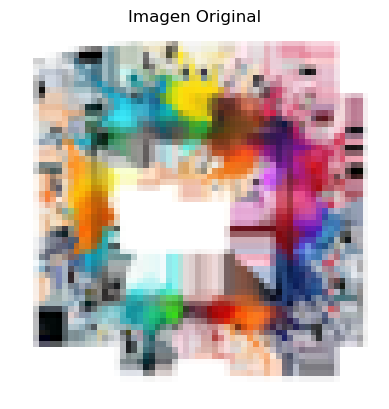

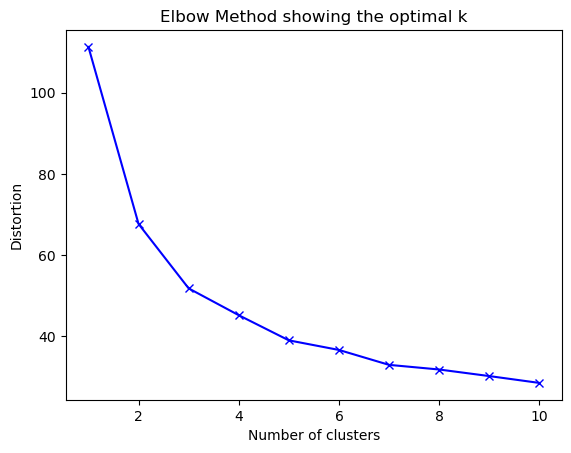

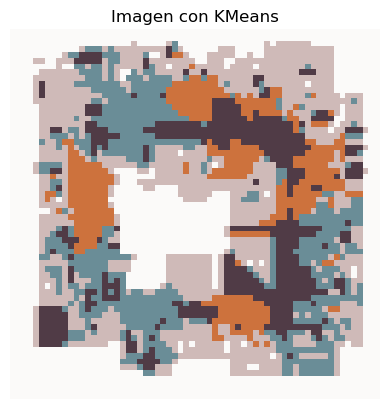

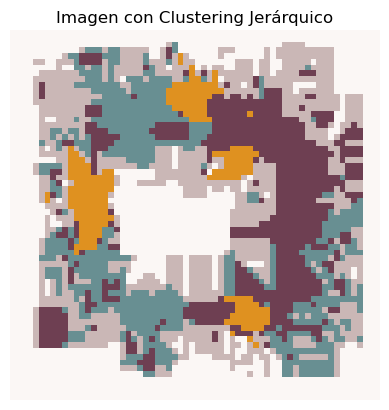

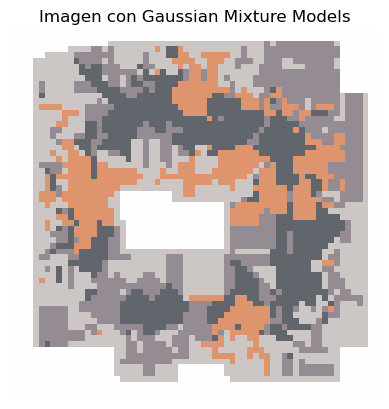

Paleta de colores (KMeans): [(251, 250, 249), (106, 141, 151), (80, 59, 70), (207, 186, 184), (205, 114, 61)]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from PIL import Image
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


# Cargar la imagen en formato .png
def load_and_resize_image(image_path, new_size=(64,64)):
    image = Image.open(image_path)
    image = image.convert('RGB')  # Asegurarse de que esté en formato RGB
    image = image.resize(new_size)  # Redimensionar a un tamaño manejable
    image_np = np.array(image)
    return image_np

# Mostrar la imagen
def show_image(image, title="Image"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Función para recomponer la imagen con la paleta reducida
def recreate_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_idx]]
            label_idx += 1
    return image

# Obtener la paleta de colores
def get_palette(cluster_centers):
    return [tuple(map(int, center)) for center in cluster_centers]

# Ajuste con KMeans
def kmeans_clustering(image_np, n_clusters):
    w, h, d = image_np.shape
    image_reshaped = image_np.reshape((w * h, d))
    
    # Aplicar KMeans
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(image_reshaped)
    
    # Obtener los centros y etiquetas
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    return cluster_centers, labels, w, h

# Ajuste con Clustering Jerárquico
def hierarchical_clustering(image_np, n_clusters):
    w, h, d = image_np.shape
    image_reshaped = image_np.reshape((w * h, d))
    
    # Aplicar Clustering Jerárquico
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(image_reshaped)
    
    # Obtener los centros de los clusters
    cluster_centers = np.array([image_reshaped[labels == i].mean(axis=0) for i in range(n_clusters)])
    
    return cluster_centers, labels, w, h

# Ajuste con Gaussian Mixture Models
def gaussian_mixture_clustering(image_np, n_clusters):
    w, h, d = image_np.shape
    image_reshaped = image_np.reshape((w * h, d))
    
    # Aplicar GMM
    gmm = GaussianMixture(n_components=n_clusters)
    gmm.fit(image_reshaped)
    
    # Obtener los centros y etiquetas
    labels = gmm.predict(image_reshaped)
    cluster_centers = gmm.means_
    
    return cluster_centers, labels, w, h

# Determinación del número óptimo de clusters mediante Scree Plot (elbow method)
def elbow_method(image_np, max_clusters=10):
    w, h, d = image_np.shape
    image_reshaped = image_np.reshape((w * h, d))
    
    distortions = []
    K = range(1, max_clusters + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(image_reshaped)
        distortions.append(sum(np.min(cdist(image_reshaped, kmeans.cluster_centers_, 'euclidean'), axis=1)) / image_reshaped.shape[0])
    
    # Scree Plot
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method showing the optimal k')
    plt.show()

# Ejecución del análisis
image_path = 'cuadro.png'  # Cambia esta ruta por la ruta de tu imagen .png
image_np = load_and_resize_image(image_path)

# Mostrar la imagen original
show_image(image_np, "Imagen Original")

# Elbow method para encontrar el número óptimo de clusters
elbow_method(image_np)

# Ajustar KMeans con el número óptimo de clusters (determinado por el codo)
n_clusters = 5  # Ajusta este valor según el resultado del elbow method
cluster_centers_kmeans, labels_kmeans, w, h = kmeans_clustering(image_np, n_clusters)
palette_kmeans = get_palette(cluster_centers_kmeans)
image_kmeans = recreate_image(cluster_centers_kmeans, labels_kmeans, w, h)

# Mostrar imagen reconstruida con KMeans
show_image(image_kmeans.astype('uint8'), "Imagen con KMeans")

# Aplicar Clustering Jerárquico
cluster_centers_hierarchical, labels_hierarchical, _, _ = hierarchical_clustering(image_np, n_clusters)
image_hierarchical = recreate_image(cluster_centers_hierarchical, labels_hierarchical, w, h)

# Mostrar imagen reconstruida con Clustering Jerárquico
show_image(image_hierarchical.astype('uint8'), "Imagen con Clustering Jerárquico")

# Aplicar Gaussian Mixtures
cluster_centers_gmm, labels_gmm, _, _ = gaussian_mixture_clustering(image_np, n_clusters)
image_gmm = recreate_image(cluster_centers_gmm, labels_gmm, w, h)

# Mostrar imagen reconstruida con Gaussian Mixtures
show_image(image_gmm.astype('uint8'), "Imagen con Gaussian Mixture Models")

# Paleta de colores de KMeans
print("Paleta de colores (KMeans):", palette_kmeans)
